In [1]:
from hypernets.utils import logging as hyn_logging

from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split

hyn_logging.set_level(hyn_logging.WARN)

In [2]:
df = dsutils.load_bank()
df.drop(['id'], axis=1, inplace=True)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
y = df_train.pop('y')
y_test = df_test.pop('y')

#### 训练模型

In [3]:
config = deeptable.ModelConfig(nets=deepnets.DeepFM, auto_discrete=True, metrics=['AUC'], earlystopping_patience=3)
dt = deeptable.DeepTable(config=config)

model, history = dt.fit(df_train, y, epochs=20)

D:\miniconda3\envs\hypergbm-dev\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\miniconda3\envs\hypergbm-dev\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\miniconda3\envs\hypergbm-dev\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
D:\miniconda3\envs\hypergbm-dev\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update you

Epoch 1/20
22/22 [==============================] - 2s 16ms/step - loss: 947.0082 - auc: 0.5035 - val_loss: 1019.2748 - val_auc: 0.5281
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 867.5159 - auc: 0.5289 - val_loss: 881.8287 - val_auc: 0.5435
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 770.4167 - auc: 0.5493 - val_loss: 733.8837 - val_auc: 0.5382
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 671.2542 - auc: 0.5715 - val_loss: 705.9562 - val_auc: 0.5278
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 527.9287 - auc: 0.5840 - val_loss: 550.4921 - val_auc: 0.5376
Epoch 5: early stopping


In [4]:
proba = dt.predict_proba(df_test)
preds = dt.predict(df_test)

In [5]:
#model.model.summary()

#### 模型评估

In [6]:
result = dt.evaluate(df_test,y_test, batch_size=512, verbose=0)
result

{'loss': 880.5029296875, 'auc': 0.5166780352592468}

#### 保存模型

In [7]:
import tempfile
tmpdir = tempfile.mkdtemp()
dt.save(tmpdir)

model_load = deeptable.DeepTable.load(tmpdir)
model_load.evaluate(df_test,y_test, batch_size=512, verbose=0)

D:\miniconda3\envs\hypergbm-dev\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


{'loss': 880.5029296875, 'auc': 0.5166780352592468}

#### 输出网络架构

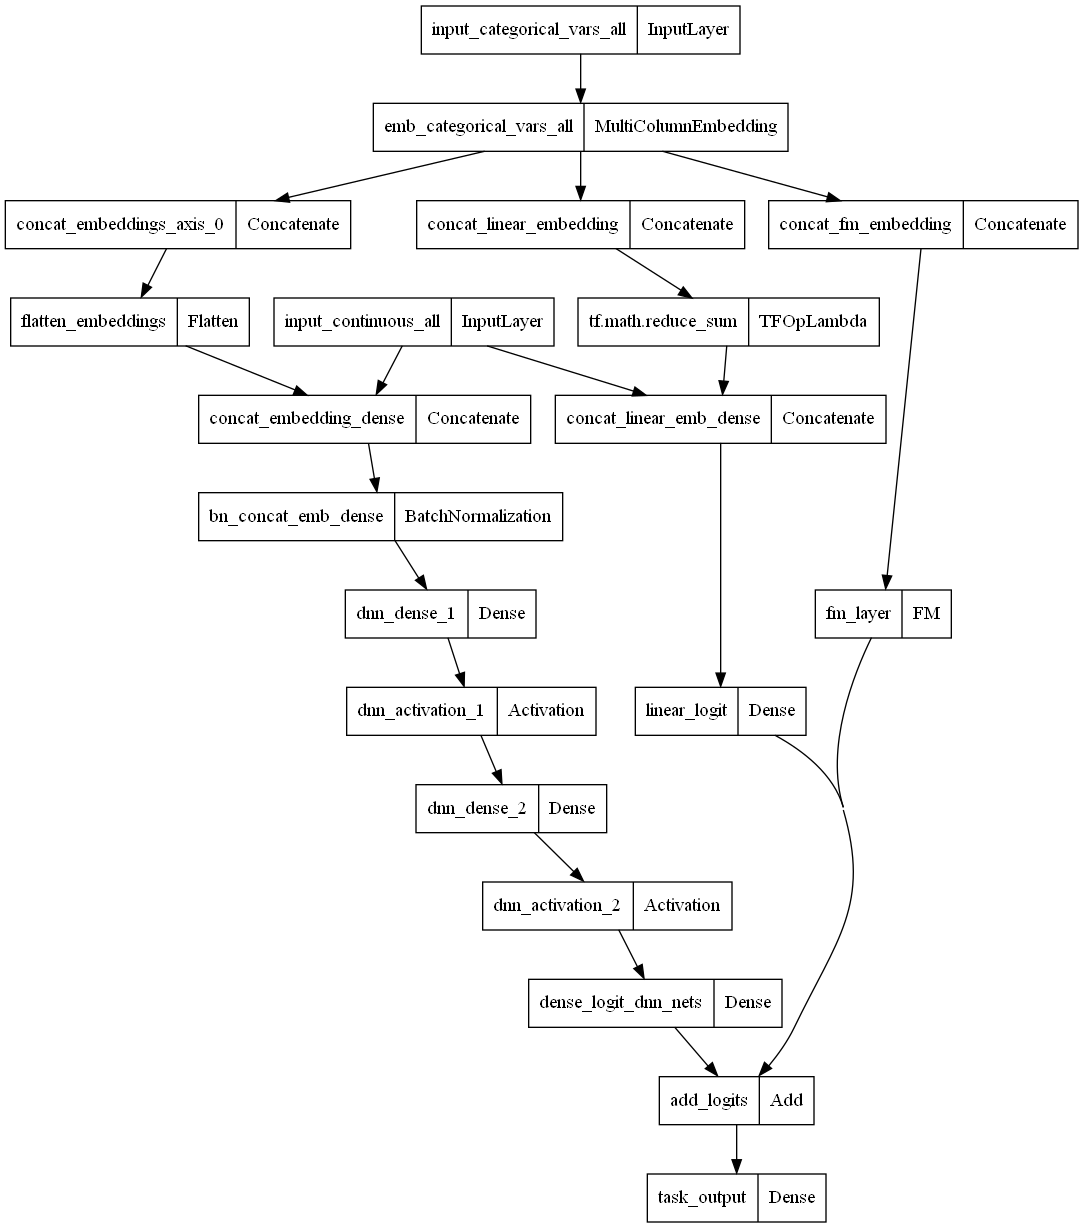

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model.model)

#### 分析训练数据

In [9]:
import matplotlib.pyplot as plt

In [10]:
history.history

{'loss': [947.0082397460938, 867.515869140625, 770.416748046875, 671.254150390625, 527.9287109375], 'auc': [0.5034979581832886, 0.5288758873939514, 0.5493136048316956, 0.5714982151985168, 0.5840261578559875], 'val_loss': [1019.2747802734375, 881.8287353515625, 733.8837280273438, 705.9561767578125, 550.4921264648438], 'val_auc': [0.5280824303627014, 0.5435103178024292, 0.5381519794464111, 0.527760922908783, 0.5376322269439697]}

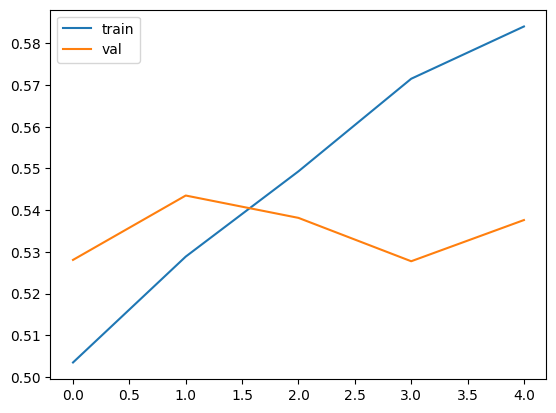

In [11]:
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.legend(['train', 'val'], loc='upper left') 

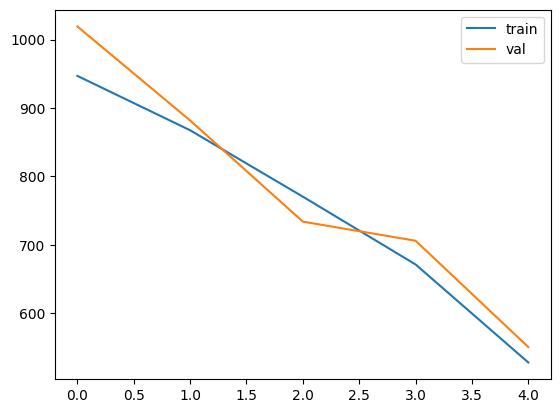

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right') 